<a href="https://colab.research.google.com/github/elime920/CUFICO_2019_2/blob/master/Parcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# With this notebook we will:
## 1. Install packages needed for root
## 2. Download a binary root that compiled in google drive "colaboratory" environement
## 3. Modify the PATH in order to tell python where to look for pyROOT
## 4. Finally, test ROOT installation with a simple example

##### Author: Jose Ruiz
##### Maintainer: Jose Ruiz
##### Developed at: Universidad de Antioquia


### 1. Install packages needed for root

In [1]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxext-dev set to manually installed.
libxft-dev is already the newest version (2.3.2-1).
binutils is already the newest version (2.30-21ubuntu1~18.04.2).
binutils set to manually installed.
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
libx11-dev set to manually installed.
tar is already the newest version (1.29b-2ubuntu0.1).
The following additional packages will be installed:
  libapr1 libaprutil1 libdpkg-perl libserf-1-1 libsvn1
Suggested packages:
  debian-keyring bz

### 2. Mount the drive to get the root binary and untar it 

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Shared drives/PyROOT_in_Google/DatosParcial2"

N1017225699.root  N1036783619.root  N1041328785.root  N1152704745.root
N1017248532.root  N1037652810.root  N1044508251.root  N1152706893.root
N1017248976.root  N1037658939.root  N1045025129.root  N1214727927.root
N1020492516.root  N1037658970.root  N1152216721.root  N1214742154.root
N1036401107.root  N1037667562.root  N1152222545.root  N1233192753.root


In [0]:
!tar -xf /content/drive/Shared\ drives/PyROOT_in_Google/root_build_google_yikes.tar

In [5]:
!ls -ltrh

total 12K
drwxr-xr-x 44 root root 4.0K Sep 20  2018 root_build
drwxr-xr-x  1 root root 4.0K Nov  6 16:17 sample_data
drwx------  4 root root 4.0K Nov 17 15:48 drive



### 3. Modify the PATH in order to tell python where to look for pyROOT


In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [7]:
import ROOT

Welcome to JupyROOT 6.14/04


Se van a analizar  80000  eventos


Warning in <TROOT::Append>: Replacing existing TH1: H1 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


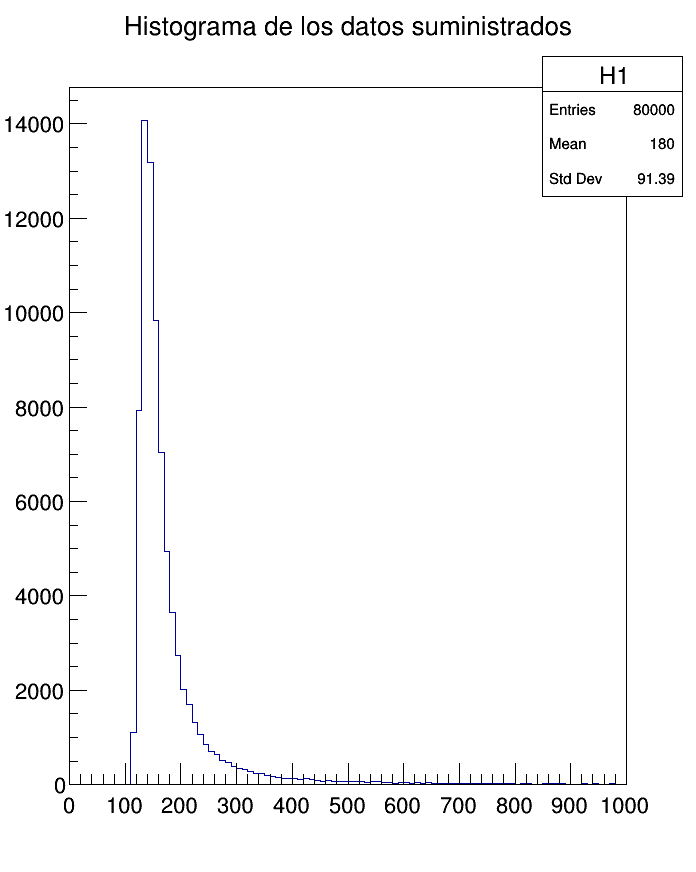

In [102]:
"""
Solución del Parcial 2, Física computacional 1.
Elizabeth Jiménez Gómez
1036401107

 1. Escriba un notebook de jupyter que permita leer los datos suministrados y que produzca un histograma
    de la variable "x". 
"""
from os import path
from ROOT import TCanvas, TPad,TFormula, TF1, TPaveLabel, TH1F, TFile, TPaveText
from ROOT import gROOT, gBenchmark
import matplotlib.pyplot as plt


Datos = ROOT.TChain("SystemTree")        
Datos.Add("/content/drive/Shared drives/PyROOT_in_Google/DatosParcial2/N1036401107.root")
Eventos = Datos.GetEntries()
print("Se van a analizar ", Eventos, " eventos")

X = []
Histograma1 = ROOT.TH1F( 'H1', 'Histograma de los datos suministrados', 100, 0, 1000 )

for entry in (Datos):
  Histograma1.Fill(entry.x)
  X.append(entry.x)

c1 = ROOT.TCanvas( 'c1', 'My First Data example', 200, 10, 700, 900 )
Histograma1.Draw()
c1.Update()
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()

Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).


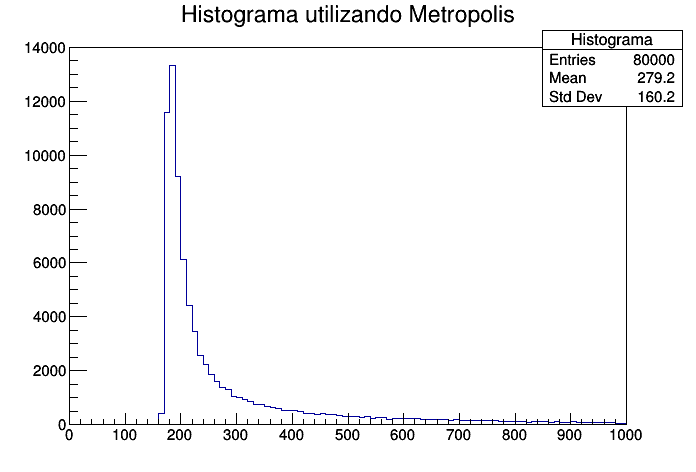

In [93]:
"""
 2. Aplique el algoritmo de Metrópolis, de acuerdo a la implementación hecha en clase, y genere una muestra de N
    valores siguiendo la distribución de probabilidad de Landau tomando unos valores de miu y c definidos. 
    N debe ser igual al número de eventos que tiene en el árbol de datos que le fue suministrado.

"""

def P(x, miu, c):                             # Distribución de probabilidad de Landau.
  Landau = ROOT.TMath.Landau(x,miu,c, True)   
  if Landau == 0:                     
    return 1e-7                               # Aquí evitamos posibles divisiones por 0 en Metrópolis
  else:
    return Landau

N = Eventos         # El número de eventos se calculó en el punto 1.

def Metropolis(N,P,args):
  a = 0                                   # Límite inferior.
  b = 1000                                # Límite superior.
  X = []
  x = np.random.random()*(b-a) + a        # Se define la semilla inicial.
  miu, c = args                           # miu y c se definen como argumentos para luego poder variarlos.
  i=0
  while i < N:
    x1 = np.random.random()*(b-a) +a      # Se define la segunda semilla.
    ds = -np.log(P(x1,miu,c)/P(x,miu,c))  
    if ds < 0:                            # Se aplica el criterio de Metrópolis.
      x = x1
      X.append(x)
      i += 1
    elif ds > 0:
      xnuevo = np.random.random_sample() 
      Pnuevo = P(x1,miu,c)/P(x,miu,c)
      if xnuevo < Pnuevo:
        x=x1
        X.append(x)
        i += 1
    else:
      continue

  return X
        
def Histograma_Metropolis(N,args):
  a = 0
  b = 1000

  Histograma = ROOT.TH1F('Histograma', 'Histograma utilizando Metropolis', 100, 0, 1000)# Defino un histograma.
  x = Metropolis(N,P,args)
  for i in x:
    Histograma.Fill(i)   # Lleno el histograma con los valores que obtengo en Metrópolis.
  return Histograma

# Aquí utilizamos miu y c definidos, para en este caso en especifico se utiliza miu = 180 y c = 4
# ya que estos son los valores que arrojan los datos en root.

args = (180,4)
HistogramaMetropolis = Histograma_Metropolis(N,args)
HistogramaMetropolis.Draw()

from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()

In [0]:
"""
3. Utilizando chi cuadrado como criterio, varie los valores de miu y c para generar diferentes muestras
   con el algoritmo de Metrópolis y encontrar el par de valores que mejor describen los datos suministrados.

"""
def Chi_cuadrado(Hist1,Hist2):        # Definimos el chi cuadrado entre histogramas.
  chi2 = 0 
  for h in range(Hist1.GetSize() + 1):  # El rango es en el número de bines de los histogramas.
    if Hist1.GetBinContent(h) != 0:     # Evitamos una posible división por 0.
      chi2 += ((Hist1.GetBinContent(h) - Hist2.GetBinContent(h))**2) / Hist1.GetBinContent(h)
      Chi2 = chi2/Hist1.GetSize()
  return Chi2


In [104]:
miu = np.arange(100,200,5)   # Variamos miu.
c = 4                        # Dejamos el c fijo, con el valor que teniamos antes.
chi_miu = []
for u in miu:
  x = Histograma_Metropolis(N,(u,c))
  y = Chi_cuadrado(Histograma1,x)
  chi_miu.append(y)

Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Repl

In [105]:
Miu_minimo = min(chi_miu)          # Encuentro el valor mínimo de la función chi cuadrado haciendo variar miu.
Valor_miu = chi_miu.index(Miu_minimo)   # Encuentro el valor que minimiza chi cuadrado
print('El miu que minimiza el valor de chi cuadrado es = ', miu[Valor_miu])

El miu que minimiza el valor de chi cuadrado es =  135


In [107]:
C = np.arange(1,10,1)     # Variamos el valor de c
miu = 135                 # Dejamos fijo el valor de miu que acabamos de encontrar.
chi_c = []
for c in C:
  x = Histograma_Metropolis(N,(miu,c))
  y = Chi_cuadrado(Histograma1,x)
  chi_c.append(y)

Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).


In [108]:
C_minimo = min(chi_c)                  #  Encuentro el valor mínimo de la función chi cuadrado haciendo variar c
Valor_c = chi_c.index(C_minimo)        # # Encuentro el valor que minimiza chi cuadrado.
print('El c que minimiza el valor de chi cuadrado es = ', C[Valor_c])

El c que minimiza el valor de chi cuadrado es =  4


Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).


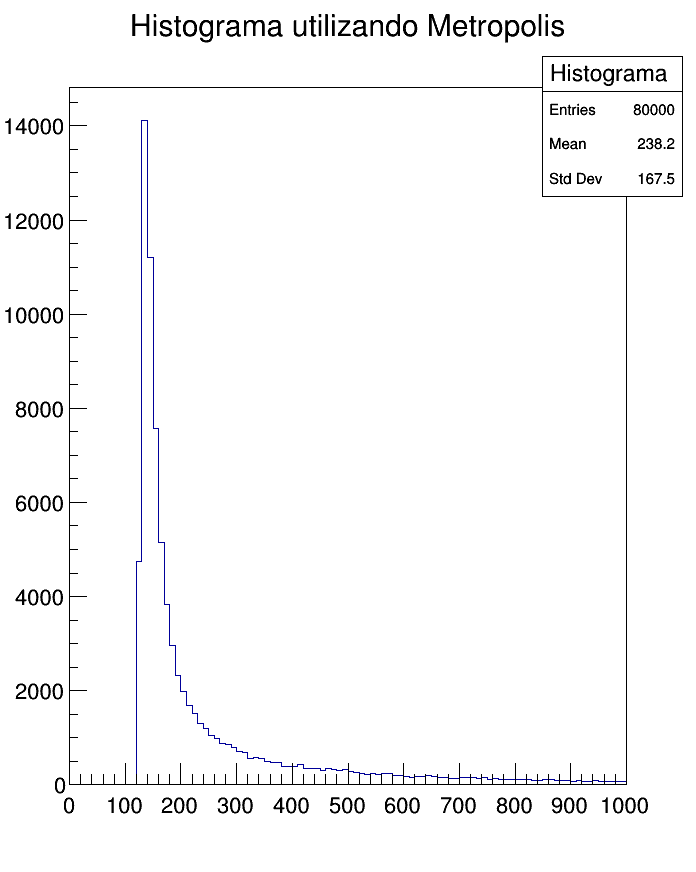

In [109]:
histograma = Histograma_Metropolis(N,(135,4))  # Hago el histograma utilizando Metrópolis y utilizando los valores que 
histograma.Draw()                              # que minimizan a chi cuadrado.
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()

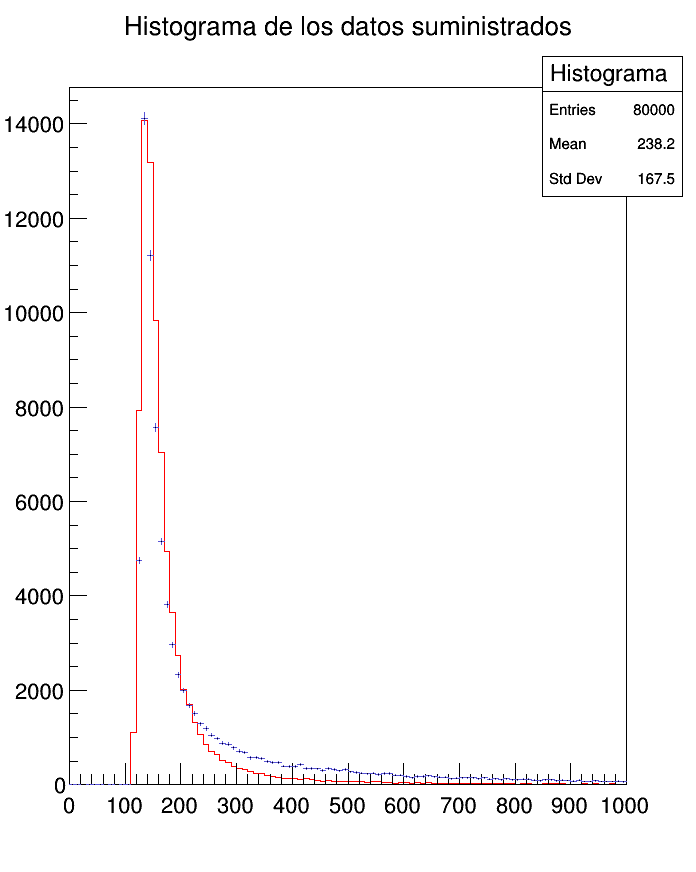

In [110]:
# Se dibujan el histograma de los datos suministrados que obtubimos en el punto 1, y el histograma con 
# miu y c óptimos. 
Histograma1.Draw()
Histograma1.SetLineColor(2)
histograma.Draw('same E')
histograma.SetLineColor(9)
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()

In [116]:
# Se hacen variar miu y c al mismo tiempo para hacer un grafico en 3D de como varia chi cuadrado 
# con respecto a miu y c.

miu = np.arange(100,200,5)
C = np.arange(1,10,1)
miu1 = []
c1 = []
chi1 = []

for i in miu:
  cc = []
  mm = []
  chichi = []
  for j in C:
    x = Histograma_Metropolis(N,(i,j))
    y = Chi_cuadrado(Histograma1,x)
    chichi.append(y)
    mm.append(i)
    cc.append(j)
  c1.append(cc)
  miu1.append(mm)
  chi1.append(chichi)

Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Histograma (Potential memory leak).
Warning in <TROOT::Append>: Repl

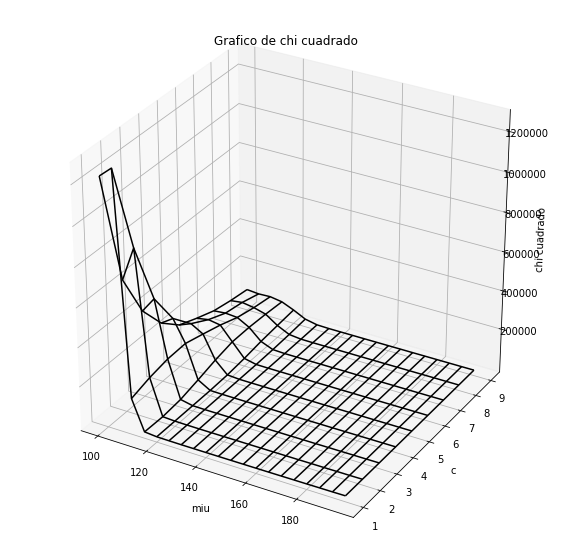

In [129]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
c1 = np.array(c1)
miu1 = np.array(miu1)
chi1 = np.array(chi1)

a = fig.add_subplot(111, projection = '3d')

a.plot_wireframe(miu1,c1,chi1,color ='k')
a.set_title('Grafico de chi cuadrado')
a.set_xlabel('miu')
a.set_ylabel('c')
a.set_zlabel('chi cuadrado')
plt.show()